In [221]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS 



In [132]:
bb  = pd.read_csv("baseball.csv")

bb.head()


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [212]:

bb.isna().sum()

# Too many missing values and/or information that is only known after a game is over

#bb.drop(['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG'] , axis=1,inplace=True)

bb.corr()

# Unsurprisingly, wins are most highly correlated with whether or not a team makes the playoffs. Now the question
# we need to answer is exactly how many wins is enough to make the playoffs.



,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744
RankSeason,0.385219,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111
RankPlayoffs,0.443967,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089


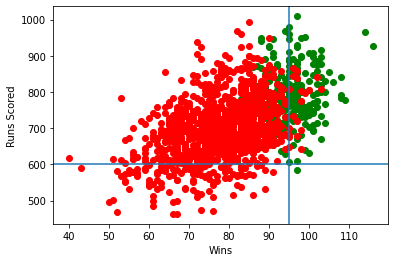

In [216]:
bb_plfs = bb.groupby('Playoffs')
plf_tms = bb_plfs.get_group(1)
nplf_tms = bb_plfs.get_group(0)
plt.scatter(x=plf_tms['W'], y = plf_tms['RS'], c='green')
plt.scatter(x=nplf_tms['W'], y = nplf_tms['RS'], c='red')
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 95)
plt.axhline(y=600)
# Looks like 95 wins and 600 runs scored is a reasonable cutoff value for making the playoffs. Now the question becomes
# how do we get these 95 wins.

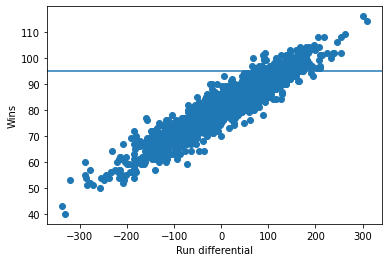

In [218]:
bb['RD'] = bb['RS'] - bb['RA']

plt.scatter(x=bb['RD'], y = bb['W'])

plt.xlabel("Run differential")
plt.ylabel("Wins")

plt.axhline(y=95)



Text(0, 0.5, 'Wins')

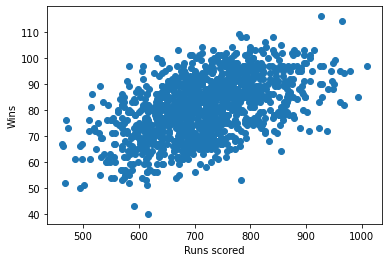

In [50]:
#plt.scatter(x=bb.RS, y=bb.W)
#plt.xlabel("Runs scored")
#plt.ylabel("Wins")

In [219]:
train_data = bb[bb['Year']<2002]
train_data.corr()
train_data.isna().sum()

# Too many missing values

#train_data.drop(['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG'] , axis=1,inplace=True)

#train_data.isna().sum()

# Let's check how many wins are usually enough to make the playoffs

train_data.groupby('Playoffs').W.agg(['mean', 'median'])

# It takes around 95 games, on average, to make the playoffs

,mean,median
Playoffs,,
0,77.835561,79
1,95.675325,95


<AxesSubplot:xlabel='W', ylabel='Team'>

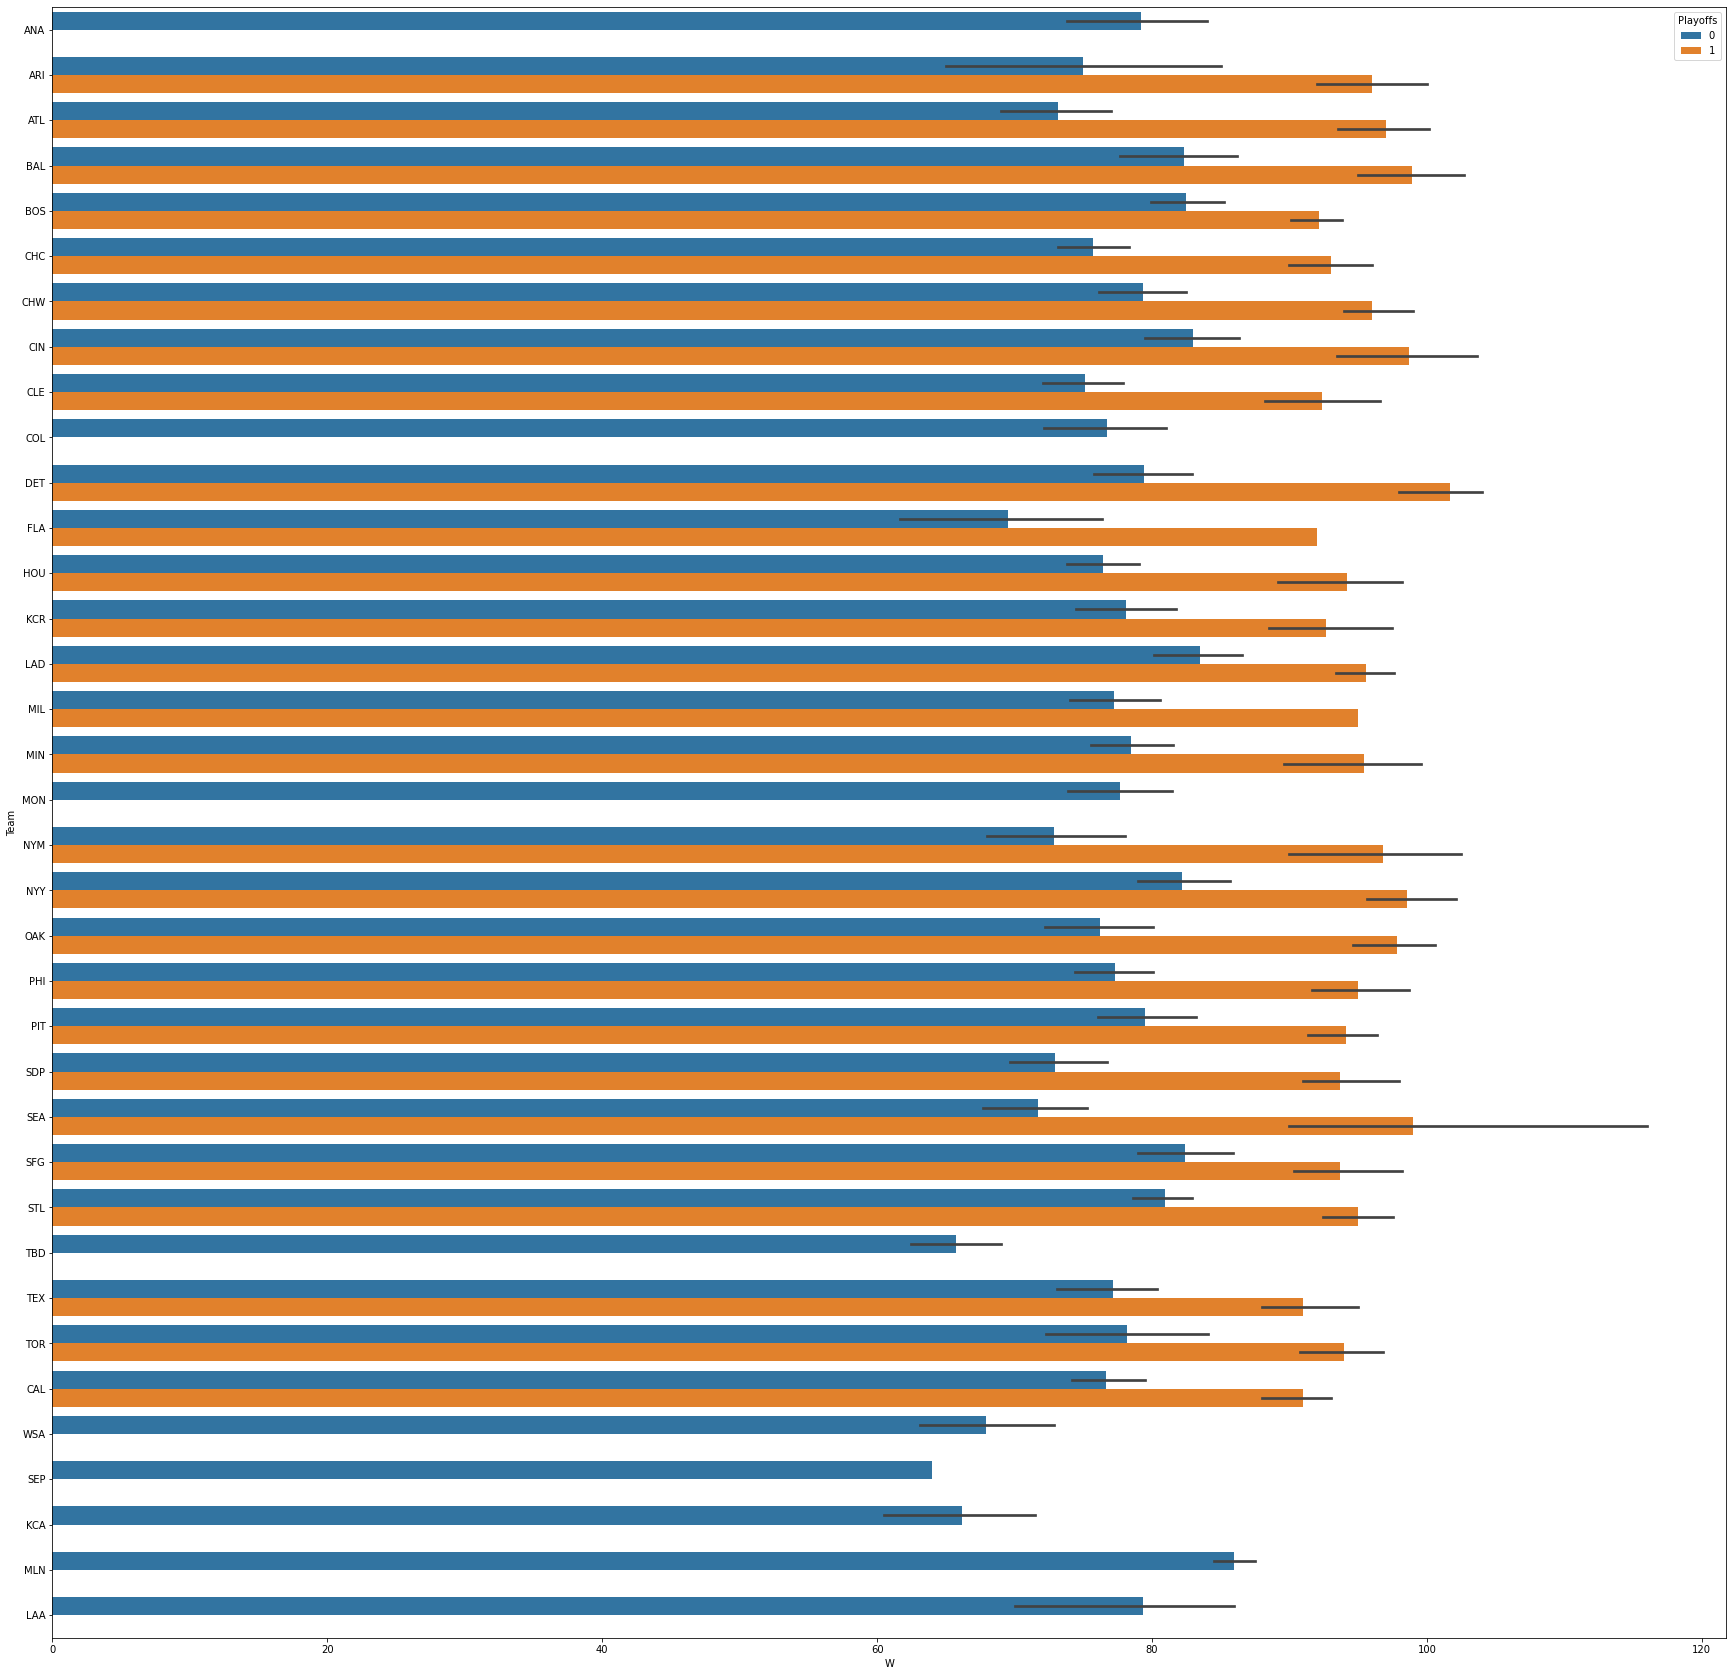

In [138]:
# Graphical confirmation
fig, ax = plt.subplots(1, 1, figsize=(30,30))

sns.barplot(y='Team', x='W', hue='Playoffs', data = train_data)

In [220]:
# Now that we know what the target number of wins is, we need to find out how to actually get to the magic number 95.


train_data[['RD', 'W']].corr()

# Seems to be useful as the correlation is more than 0.9



,RD,W
RD,1.000000,0.938515
W,0.938515,1.000000


In [230]:
# Let's try with the simplest model possible - linear regression

x=train_data[['RD']]
x=sm.add_constant(x)
y=train_data[['W']]
win_m=OLS(y,x)
win_m = win_m.fit()
win_m.summary()


c:\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:29:32   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.000      80.624      81.139
RD             0.1058      0.001     81.554      0.000       0.103       0.108
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
# From the regression equation we get that we will need a run differential of 133 in order to 
# win 95 games
# The next thing we have to do is find out how a team can score 133 more runs than it allows.


x=train_data[['OBP', 'SLG', 'BA']]
x=sm.add_constant(x)
y=train_data['RS']
rd_m=OLS(y,x)
rd_m = rd_m.fit()
rd_m.summary()

# Very high adjusted R^2, all predictors seem relevant. Interestingly enough, BA has a negative coefficient, which
# doesn't make much sense as we expect to score more runs when the BA is higher.
# Let's see what happens when we remove BA

x_1=train_data[['OBP', 'SLG']]
x_1=sm.add_constant(x_1)
y_1=train_data['RS']
rs_m=OLS(y_1,x_1)
rs_m = rs_m.fit()
rs_m.summary()

train_data['OPS'] = train_data['OBP'] + train_data['SLG']

x_3=train_data[['OPS']]
x_3=sm.add_constant(x_3)
y_2=train_data['RS']
rs_m2=OLS(y_2,x_3)
rs_m2 = rs_m2.fit()
rs_m2.summary()

# Almost the same adjusted R^2 and a much more simple model than the one we started with.
# Same conclusion as the one Beane and DePodesta arrived at - there is value to be gained by evaluating players
# according to their OBP and SLG percentage (or equivalently, their OPS). At the time BA was the leading metric
# but, as we can see, it should not have been given so much importance.



train_data = train_data.dropna(subset = ['OOBP', 'OSLG'])

train_data['OOPS'] = train_data['OOBP'] + train_data['OSLG']


x_6=train_data['OOPS']
x_6=sm.add_constant(x_6)
y_3=train_data['RA']
m_ra=OLS(y_3,x_6)
m_ra=m_ra.fit()
m_ra.summary()

# Once again the model looks quite decent (high adjusted R-sq, low variance of the coefficients).

# Now, we can use the results to predict whether or not the A's will make the playoffs. 



c:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RA   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     764.4
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           3.64e-45
Time:                        17:20:05   Log-Likelihood:                -423.13
No. Observations:                  90   AIC:                             850.3
Df Residuals:                      88   BIC:                             855.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -752.6888     56.578    -13.303      0.000    -865.127    -640.251
OOPS        2021.0871     73.103     27.647      0.000    1875.810    2166.364
==============================================================================
Omnibus:                        4.297   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                3.742
Skew:                          -0.351   Prob(JB):                        0.154
Kurtosis:                       3.711   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
oak=train_data[train_data['Team']=='OAK']
oak_2001 = oak[oak['Year']==2001]
oak_2001_oops=oak_2001['OOPS']

as_2002_ra=m_ra.predict([1, oak_2001_oops])
as_2002_ra = as_2002_ra.astype('float')


oak1=test_data[test_data['Team']=='OAK']
oak_2002=oak1[oak1['Year']==2002]
oak_2002_ops = oak_2002['SLG'] + oak_2002['OBP']

as_2002_rs=rs_m2.predict([1,oak_2001['OPS']])

as_2002_rs = as_2002_rs.astype('float')

as_2002_est_rd = as_2002_rs[0] - as_2002_ra[0]

as_2002_est_rd

# The estimated run differential is 198.5
# This means that we expect the A's to make the playoffs next season under the assumption that they perform
# somewhat similarly to 2001, which they did.




198.53857219264341